# EDA анализ собранных научных статей с arxiv.org

In [ ]:
import json
import re
from pathlib import Path

import matplotlib.pyplot as plt
import nltk
import pandas as pd
import seaborn as sns
from nltk.corpus import stopwords
from tqdm import tqdm

nltk.download("stopwords")

PROJECT_ROOT = Path("..")
JSON_DIR = PROJECT_ROOT / "data" / "raw" / "json"

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivanmahrov/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
papers = []
for json_path in tqdm(list(JSON_DIR.glob("*.json")), desc="Loading JSONs"):
    with Path.open(json_path, "r", encoding="utf-8") as f:
        papers.append(json.load(f))

Loading JSONs: 100%|██████████| 3004/3004 [00:06<00:00, 489.13it/s]


### 1.Анализ текстов научных статей

In [3]:
def process_text(text):
    text = text.replace("-\n", "")
    text = text.replace("\n", " ")
    text = text.replace("\n1", "")
    text = text.replace("\n2", "")
    text = re.sub(r"[^a-zA-Z\s']", " ", text)
    text = re.sub(r"\s+", " ", text)
    return text.strip()

Total papers: 3004


100%|██████████| 3004/3004 [00:29<00:00, 100.63it/s]


Median tokens per paper: 7876
Mean tokens per paper: 8937
Min/Max tokens: 540/150004


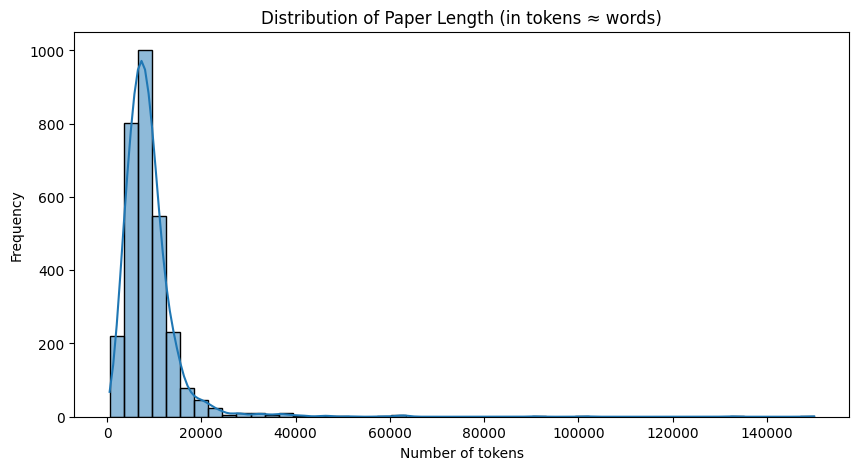

In [4]:
print(f"Total papers: {len(papers)}")

full_texts = []
for p in tqdm(papers):
    text = process_text(p["full_text"])
    full_texts.append(text)

tokens_per_paper = [len(t.split()) for t in full_texts]
df = pd.DataFrame({"tokens": tokens_per_paper})

print(f"Median tokens per paper: {df['tokens'].median():.0f}")
print(f"Mean tokens per paper: {df['tokens'].mean():.0f}")
print(f"Min/Max tokens: {df['tokens'].min()}/{df['tokens'].max()}")

plt.figure(figsize=(10, 5))
sns.histplot(df["tokens"], bins=50, kde=True)
plt.title("Distribution of Paper Length (in tokens ≈ words)")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.show()

In [5]:
text_words = {}

stop_words = set(stopwords.words("english"))

for full_text in tqdm(full_texts):
    full_text_filtered = [word for word in full_text.split(" ") if word.lower() not in stop_words]
    for word in full_text_filtered:
        text_words[word] = text_words.get(word, 0) + 1

text_words = dict(sorted(text_words.items(), key=lambda item: item[1], reverse=True))

max_words = 20
for i, data in enumerate(text_words.items()):
    if i == max_words:
        break
    print(f"{data[0]}: {data[1]}")

100%|██████████| 3004/3004 [00:18<00:00, 163.74it/s]


et: 124951
al: 121417
model: 111732
B: 110724
models: 100776
arXiv: 69461
language: 63918
reasoning: 59265
based: 51738
data: 51401
performance: 49059
training: 48893
across: 48701
e: 46352
LLM: 41801
Figure: 39749
using: 39194
Table: 38629
text: 38570
C: 35938


### 2.Анализ авторов научных статей

100%|██████████| 3004/3004 [00:00<00:00, 726877.19it/s]


Median tokens per paper: 5
Mean tokens per paper: 6
Min/Max tokens: 1/484


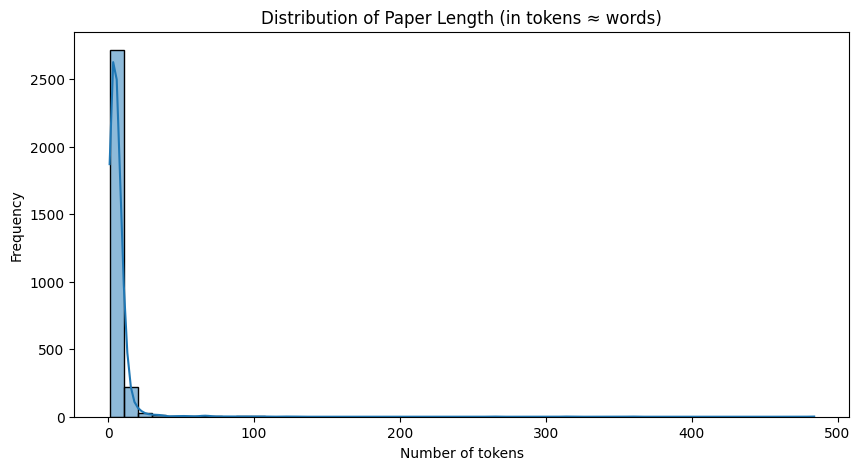

In [6]:
authors = []
for p in tqdm(papers):
    authors.append(p["authors"])

tokens_per_paper = [len(t) for t in authors]
df = pd.DataFrame({"tokens": tokens_per_paper})

print(f"Median tokens per paper: {df['tokens'].median():.0f}")
print(f"Mean tokens per paper: {df['tokens'].mean():.0f}")
print(f"Min/Max tokens: {df['tokens'].min()}/{df['tokens'].max()}")

plt.figure(figsize=(10, 5))
sns.histplot(df["tokens"], bins=50, kde=True)
plt.title("Distribution of Paper Length (in tokens ≈ words)")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.show()

In [7]:
author_names = {}

for author_list in authors:
    for author in author_list:
        author_names[author] = author_names.get(author, 0) + 1

author_names = dict(sorted(author_names.items(), key=lambda item: item[1], reverse=True))

max_words = 20
for i, data in enumerate(author_names.items()):
    if i == max_words:
        break
    print(f"{data[0]}: {data[1]}")

Yang Liu: 13
Wentao Zhang: 12
Bo Zheng: 12
Jian Yang: 11
Yang Li: 11
Dhruv Kumar: 10
Xiangyu Zhao: 10
Qi Zhang: 10
Wei Zhang: 10
Mengdi Wang: 9
Yue Zhang: 9
Hao Wang: 9
Jie Zhang: 8
Bing Qin: 8
Jingren Zhou: 8
Mohit Bansal: 8
Liang Zhao: 8
Xiang Li: 8
 :: 8
Peng Zhang: 8


### 3.Анализ заголовков научных статей

Median tokens per title: 11
Mean tokens per title: 11
Min/Max tokens: 1/26


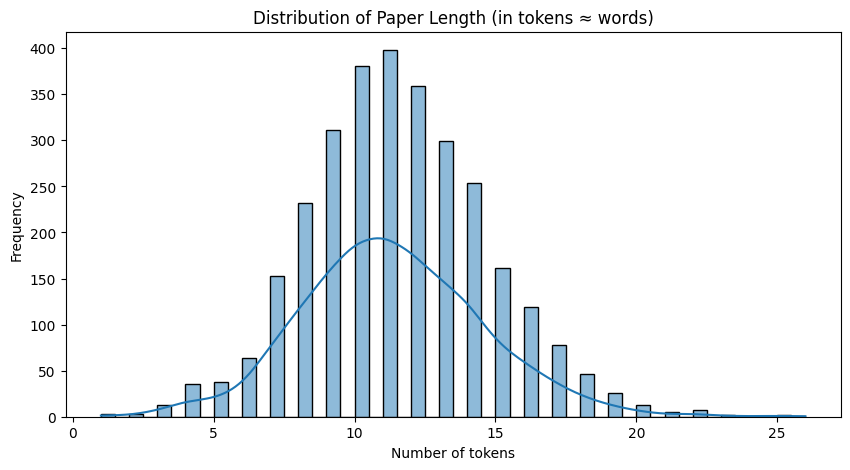

In [8]:
titles = []
for p in papers:
    title = process_text(p["title"])
    titles.append(title)

tokens_per_title = [len(t.split()) for t in titles]
df = pd.DataFrame({"tokens": tokens_per_title})

print(f"Median tokens per title: {df['tokens'].median():.0f}")
print(f"Mean tokens per title: {df['tokens'].mean():.0f}")
print(f"Min/Max tokens: {df['tokens'].min()}/{df['tokens'].max()}")

plt.figure(figsize=(10, 5))
sns.histplot(df["tokens"], bins=50, kde=True)
plt.title("Distribution of Paper Length (in tokens ≈ words)")
plt.xlabel("Number of tokens")
plt.ylabel("Frequency")
plt.show()

In [9]:
title_words = {}

stop_words = set(stopwords.words("english"))

for title in titles:
    title_filtered = [word for word in title.split(" ") if word.lower() not in stop_words]
    for word in title_filtered:
        title_words[word] = title_words.get(word, 0) + 1

title_words = dict(sorted(title_words.items(), key=lambda item: item[1], reverse=True))

max_words = 20
for i, data in enumerate(title_words.items()):
    if i == max_words:
        break
    print(f"{data[0]}: {data[1]}")

Language: 752
Models: 617
Large: 443
Reasoning: 345
LLM: 313
LLMs: 283
via: 266
Multi: 231
Learning: 214
Model: 188
Generation: 176
Framework: 172
Text: 146
Benchmark: 126
Efficient: 125
Agent: 125
Retrieval: 121
AI: 121
Data: 119
Analysis: 118
